In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data\test.csv
./data\train.csv


In [4]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
train_data.rename(columns={'y':'subscribed'}, inplace=True)
test_data.rename(columns={'y':'subscribed'}, inplace=True)
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (45211, 17)
Test data shape: (4521, 17)


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
train_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Splitting our dataset into features (what we use to predict) and classes (what we're predicting)¶

-Our dataset today is already split into train and test data. This is done so that our models can be tested on data that is has never seen before. This is an important step in training any model, and lets us accurately determine how well our model performs and will perform when we start to use it in the wild.
-The dataset is split into roughly 90% training and 10% testing data which is useful due to the complex nature of the problem meaning that more data is available for testing, in some cases it might be better to have more unseen data to test on but this split works well for our use case.
-We use all but the last column of the dataframe as features to train our models, and take the last column as the class we are trying to predict.
-We can write out the set of categorical columns and numerical columns here for future use.

In [13]:
train_features, train_classes = train_data.iloc[:,:-1], train_data['subscribed']
test_features, test_classes = test_data.iloc[:,:-1], test_data['subscribed']

In [14]:
num_features = ['age','balance','day','duration','pdays']
cat_features = ['job', 'marital','education','default','housing','contact','poutcome', 'month']

In [16]:
#scikit-learn is open-source machine learning library
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

-We do Scaling for numerical features and One-hot encoding for categorical features and the target class.
-Once we have done that we can join them into one DataFrame again.
SLIDE 4 HERE

The output range of the fit_transform() method depends on the specific scaler or normalization technique used. Different scalers in scikit-learn have different output ranges. Here are some common examples:

-StandardScaler:

The StandardScaler standardizes the features by removing the mean and scaling to unit variance.
The output range of fit_transform() with StandardScaler is not bounded to a specific range, but the transformed features will have a mean of 0 and a standard deviation of 1.

-MinMaxScaler:

The MinMaxScaler scales the features to a given range, typically [0, 1].
The output range of fit_transform() with MinMaxScaler is the specified range, which is [0, 1] by default.

-RobustScaler:

The RobustScaler removes the median and scales the data according to the quantile range (default is IQR: Interquartile Range).
The output range of fit_transform() with RobustScaler is not bounded to a specific range, but the transformed features will have a median of 0 and an interquartile range (IQR) of 1.

-Normalizer:

The Normalizer rescales each sample (row) to have a unit norm (length of 1).
The output range of fit_transform() with Normalizer is not bounded to a specific range, but each sample vector will have a Euclidean length (L2 norm) of 1.

-QuantileTransformer:

The QuantileTransformer transforms the features to follow a uniform or a normal distribution.
The output range of fit_transform() with QuantileTransformer depends on the chosen output distribution (uniform or normal) and the specified quantiles.

In [17]:
scaler = StandardScaler()

features_to_scale = pd.DataFrame(scaler.fit_transform(train_features[num_features]), columns=num_features)
features_to_scale

,age,balance,day,duration,pdays
0,1.606965,0.256419,-1.298476,0.011016,-0.411453
1,0.288529,-0.437895,-1.298476,-0.416127,-0.411453
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.411453
3,0.571051,0.047205,-1.298476,-0.645231,-0.411453
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.411453
...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,-0.411453
45207,2.831227,0.120447,0.143418,0.768224,-0.411453
45208,2.925401,1.429593,0.143418,3.373797,1.436189
45209,1.512791,-0.228024,0.143418,0.970146,-0.411453


SLIDE 5 HERE

pd.get_dummies(train_features[cat_features]).astype(int) and understand what it does:

train_features[cat_features]: This part selects the categorical features from the train_features DataFrame. cat_features is likely a list or an array containing the names of the categorical columns in your dataset.

pd.get_dummies(train_features[cat_features]): This part performs one-hot encoding on the selected categorical features using the get_dummies function from the Pandas library.

One-hot encoding is a common technique used to convert categorical variables into a format that can be used by machine learning algorithms that expect numerical input. It creates binary (0 or 1) columns for each unique category in the categorical feature.

For example, if you have a categorical feature called "Color" with three unique values: "Red", "Green", and "Blue", get_dummies will create three new columns: "Color_Red", "Color_Green", and "Color_Blue". Each row will have a 1 in the column corresponding to its category and 0 in the other columns.

.astype(int): This part converts the data type of the resulting one-hot encoded columns from float to integer.
By default, get_dummies creates columns with float data types. However, since the values in these columns are either 0 or 1, it's more efficient and memory-friendly to store them as integers.

So, the complete code pd.get_dummies(train_features[cat_features]).astype(int) does the following:

Selects the categorical features from the train_features DataFrame.
Performs one-hot encoding on these categorical features, creating new binary columns for each unique category.
Converts the data type of the resulting one-hot encoded columns from float to integer.
The output of this code will be a new DataFrame containing the one-hot encoded categorical features, with each unique category represented by a separate column with integer values (0 or 1).

In [18]:
features_to_encode = pd.get_dummies(train_features[cat_features]).astype(int)
features_to_encode

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
encoded_target_class = pd.get_dummies(train_classes, drop_first=True).astype(int)
encoded_target_class

,yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [20]:
preprocessed_data = pd.concat([features_to_scale, features_to_encode], axis=1)
preprocessed_data

,age,balance,day,duration,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.606965,0.256419,-1.298476,0.011016,-0.411453,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.411453,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.411453,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.411453,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.411453,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,-0.411453,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,2.831227,0.120447,0.143418,0.768224,-0.411453,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,2.925401,1.429593,0.143418,3.373797,1.436189,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,1.512791,-0.228024,0.143418,0.970146,-0.411453,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Carrying out feature selection¶

Wrapper based approach
In wrapper based approaches, we evaluate a subset of features on the model we are using. Then we either add or remove features depending if they cause the model to perform better or worse.

The algorithm follows these steps:

-Create a features set (null feature set if using forward selection, all the features if using backward selection).
-Carry out the Machine learning algorithm on the set.
-Evaluate the importance of the chosen features.
-Change the set of features to a new subset (add the best performing feature if using forward selection, remove the least important feature if using backward selection).

For example, in Recursive Feature Elimination, we tell the algorithm how many features we want the model to end up having. Then it repeatedly fits the model and removes the least important feature from the dataset until we have the desired number of features.

In [21]:
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=10)

In [22]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

fit = rfe.fit(preprocessed_data, encoded_target_class)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

10
[False False False  True False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False  True False False  True  True False
 False  True False False False  True  True False False  True  True]
[38 31 30  1 37 17 23 21 12 33  9 25 27  1 32 35 22 26 14 29 10 16 34 24
 19 18 28  4 15 20  1  2  3  1  1 36  8  1 13  5  6  1  1 11  7  1  1]




Sure, let's explain the meanings of these three fields:

print(fit.n_features_):

n_features_ is an attribute of the RFE object after it has been fitted to the data.
It represents the number of features that were selected by the RFE algorithm.
In the code you provided, n_features_to_select was set to 10, so fit.n_features_ should print the value 10, indicating that 10 features were selected.
print(fit.support_):

support_ is a boolean mask or array that indicates which features were selected by the RFE algorithm.
It has the same length as the number of input features.
If support_[i] is True, it means that the i-th feature was selected by the RFE algorithm.
If support_[i] is False, it means that the i-th feature was not selected and was eliminated by the RFE algorithm.
This boolean mask can be useful for identifying and extracting the selected features from the original feature set.
print(fit.ranking_):

ranking_ is an array that provides the ranking or ordering of features based on their importance or contribution to the target variable.
The length of ranking_ is equal to the number of input features.
The values in ranking_ represent the ranking of each feature, with 1 being the most important feature, 2 being the second most important feature, and so on.
Features that were not selected by the RFE algorithm will have higher ranking values (closer to the number of input features).
This ranking can be useful for understanding the relative importance of features and potentially selecting a different number of top features based on their ranking.

In [23]:
feature_rank = pd.DataFrame({'columns':preprocessed_data.columns,
                            'ranking': fit.ranking_,
                            'selected':fit.support_})
result_features = feature_rank.loc[feature_rank['selected']==True]
result_features

,columns,ranking,selected
3,duration,1,True
13,job_student,1,True
30,contact_unknown,1,True
33,poutcome_success,1,True
34,poutcome_unknown,1,True
37,month_dec,1,True
41,month_jun,1,True
42,month_mar,1,True
45,month_oct,1,True
46,month_sep,1,True


Embedded approach

The embedded approach entails that the feature selection is done at the same time as the model training. Most models will have some way of determining how important a feature was when it was fitting the data. For example, in a linear or logistic regression model, the coefficients of the features will tell you how important they are. A small coefficient means that the feature has little importance to the model.

Some models, like LASSO regression, will enforce small coefficients to be equal to zero to make sure the model is as simple as possible.

SLIDE 6 HERE

The below logistic regression model has been set so that it eliminates the features with the least importance.

In [24]:
model_embedded = LogisticRegression(solver='liblinear', penalty='l1')

log_reg = model_embedded.fit(preprocessed_data, encoded_target_class)
feature_importance = pd.DataFrame({'feature':preprocessed_data.columns,
                                   'importance':log_reg.coef_[0]})

feature_importance['magnitude'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values('magnitude')
feature_importance.head(10)

,feature,importance,magnitude
14,job_technician,0.000000,0.000000
26,housing_no,0.000000,0.000000
23,education_unknown,0.000000,0.000000
28,contact_cellular,0.000000,0.000000
24,default_no,0.000000,0.000000
19,marital_single,0.000000,0.000000
35,month_apr,0.000000,0.000000
32,poutcome_other,0.000000,0.000000
0,age,0.003393,0.003393
9,job_management,0.012319,0.012319


The two code snippets you provided are different approaches to feature selection in machine learning, specifically for logistic regression models. Let's compare them:

Previous Code:
    from sklearn.feature_selection import RFE

    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model, n_features_to_select=10)
    fit = rfe.fit(preprocessed_data, encoded_target_class)



This code uses the Recursive Feature Elimination (RFE) technique from scikit-learn's feature_selection module. RFE is a wrapper method that recursively removes features from the model based on their importance or contribution to the target variable. It starts with the full set of features, fits the model, ranks the features based on their importance, and then removes the least important features. This process is repeated until the desired number of features (n_features_to_select=10) is reached.

New Code:
    model_embedded = LogisticRegression(solver='liblinear', penalty='l1')

    log_reg = model_embedded.fit(preprocessed_data, encoded_target_class)
    feature_importance = pd.DataFrame({'feature': preprocessed_data.columns,
                                    'importance': log_reg.coef_[0]})

    feature_importance['magnitude'] = feature_importance['importance'].abs()
    feature_importance = feature_importance.sort_values('magnitude')
    feature_importance.head(10)



This code uses an embedded feature selection method called Lasso (L1) regularization. Lasso is a type of regularization technique that adds a penalty term to the logistic regression objective function, which encourages sparse solutions (i.e., some coefficients become exactly zero). The penalty='l1' parameter in LogisticRegression enables Lasso regularization.

When you fit the logistic regression model with Lasso regularization (model_embedded.fit()), it automatically performs feature selection by setting the coefficients of less important features to zero. The remaining non-zero coefficients correspond to the features that are considered important by the model.

The code then creates a DataFrame feature_importance with the feature names and their corresponding coefficients (importance) from the fitted logistic regression model (log_reg.coef_[0]). It calculates the absolute magnitude of the coefficients, sorts the features based on their magnitude, and displays the top 10 most important features using feature_importance.head(10).

The main difference between the two approaches is:

RFE is a wrapper method that uses an external feature selection technique to recursively eliminate features from the model based on their importance.
Lasso (L1) regularization is an embedded method that performs feature selection as part of the model training process by shrinking the coefficients of less important features to zero.
Both approaches can be effective for feature selection, but they have different characteristics and trade-offs. RFE is more flexible as it can be used with any estimator or model, but it can be computationally expensive, especially for high-dimensional data. Lasso regularization is more efficient and integrated into the model training process, but it is specific to linear models like logistic regression.

PCA¶
Principal component analysis transforms the set of features into a set of new features which are linear combinations of the old ones.

These linear combinations are chosen so that the first principal component lies in the direction where there is the most variance in the data. The second principal component lies orthogonally in the direction of the second most variance and so on.

This helps because we can reduce the dimensions of the data by choosing only a few of the principal components.

SLIDE 7 HERE

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca_transformed_features = pca.fit_transform(preprocessed_data)
pca.components_

array([[-3.45768575e-01, -1.37831032e-01, -3.07755906e-01, ...,
        -6.15283149e-03,  1.24734256e-03,  6.60489058e-03],
       [ 6.99748986e-01,  4.86265632e-01, -2.00216696e-01, ...,
         2.37052766e-02,  1.05037390e-02,  8.90379168e-03],
       [-8.53156875e-02,  6.41572841e-02, -4.70145611e-01, ...,
        -1.92222062e-02, -3.13442150e-03,  1.12060999e-03],
       ...,
       [ 0.00000000e+00, -3.01616746e-17,  9.65542701e-18, ...,
         2.21091958e-02,  2.21091958e-02,  2.21091958e-02],
       [-0.00000000e+00, -3.52409844e-17, -1.26976222e-16, ...,
         3.78693957e-03,  3.78693957e-03,  3.78693957e-03],
       [ 0.00000000e+00,  5.44585791e-17,  4.29490920e-17, ...,
         6.92136427e-02,  6.92136427e-02,  6.92136427e-02]])

The explained variance ratio tells us how much of the variance is explained by each principal component. This can influence our choice of which components we would like to keep. For example, the vast majority of the variance here is explained by the first 20 components, so we may only want to keep them.

In [28]:
pca.explained_variance_ratio_

array([1.39897081e-01, 1.29482165e-01, 1.10845828e-01, 1.07643616e-01,
       1.00884047e-01, 7.30014368e-02, 4.70969041e-02, 3.90102290e-02,
       3.40222206e-02, 2.64146348e-02, 1.89422361e-02, 1.71534320e-02,
       1.46462082e-02, 1.44531800e-02, 1.30586133e-02, 1.10900783e-02,
       1.08034476e-02, 9.83371406e-03, 8.50623383e-03, 7.65611369e-03,
       6.89345023e-03, 6.11854330e-03, 5.64333804e-03, 5.36903886e-03,
       4.99112984e-03, 4.53486209e-03, 3.98185189e-03, 3.80750872e-03,
       3.64703148e-03, 3.50424923e-03, 3.23498609e-03, 3.06662741e-03,
       2.87412087e-03, 2.07826903e-03, 1.88917521e-03, 1.45582104e-03,
       1.20109743e-03, 7.19367076e-04, 5.48112876e-04, 1.81157658e-17,
       6.86570462e-18, 6.13456313e-18, 3.87912585e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

The output pca.explained_variance_ratio_ represents the proportion of variance in the original dataset that is explained by each principal component (PC) after applying Principal Component Analysis (PCA).

In the example you provided, the output is an array with 48 values, where each value corresponds to the explained variance ratio for one of the 48 principal components.

Let's break down the meaning of this output:

Explained Variance Ratio: The explained variance ratio is a measure of how much of the total variance in the original dataset is captured or explained by a particular principal component.

Interpretation:

The first value in the array (1.39897081e-01 or approximately 0.139897081) represents the explained variance ratio for the first principal component (PC1). This means that PC1 explains approximately 13.99% of the total variance in the original dataset.
The second value (1.29482165e-01 or approximately 0.129482165) represents the explained variance ratio for the second principal component (PC2), which explains approximately 12.95% of the total variance.
The third value (1.10845828e-01 or approximately 0.110845828) represents the explained variance ratio for the third principal component (PC3), which explains approximately 11.08% of the total variance.
And so on, for each subsequent principal component.
Cumulative Explained Variance: The sum of the explained variance ratios for all principal components should be equal to 1 (or 100% of the total variance). This is because PCA aims to capture the maximum possible variance from the original dataset using a reduced number of principal components.

Dimensionality Reduction: The explained variance ratios can help determine how many principal components to retain in order to capture a desired amount of variance from the original dataset. Typically, you would retain the principal components that cumulatively explain a significant portion of the total variance (e.g., 90% or 95%), while discarding the remaining components that contribute little to the overall variance.

By examining the explained variance ratios, you can assess the trade-off between the number of principal components retained and the amount of information (variance) preserved from the original dataset. This information can guide the selection of an appropriate number of principal components for dimensionality reduction or feature extraction purposes.

It's important to note that the interpretation of the explained variance ratios may depend on the specific problem and the nature of the dataset. In some cases, even principal components with relatively low explained variance ratios may contain valuable information for the task at hand.

All the components together explain 100% of the variance, meaning all the PCA components constitute an equally true representation of the data.

In [30]:
sum(pca.explained_variance_ratio_)

np.float64(1.0000000000000002)

Text(0, 0.5, 'cumulative variance')

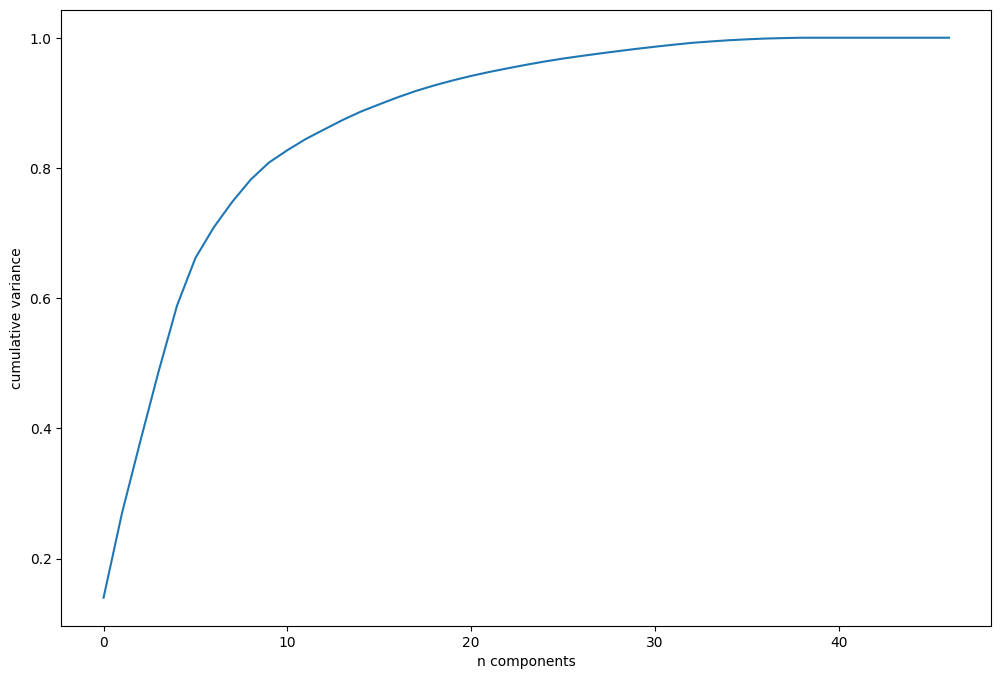

In [31]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [32]:
sum(pca.explained_variance_ratio_[0:20])

np.float64(0.9344414192807113)

Now we can make a new dataframe of the transformed data using only the first 20 components. This means we have a new dataset which has about half the features but retains most of the variance.

In [33]:
pca_2 = PCA(n_components=20)
principal_components = pd.DataFrame(pca_2.fit_transform(preprocessed_data))
principal_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.617451,1.235754,0.676244,-1.330718,0.302519,0.816547,-1.522313,-0.053932,-0.326258,-0.649579,0.245827,-0.334684,-0.270913,0.064850,-0.282145,-0.051773,-0.017562,-0.085868,0.122365,-0.003135
1,0.138622,-0.453033,0.462980,-1.460778,0.605029,0.825006,0.171129,-0.807176,-0.937038,-0.301030,0.526427,0.515407,-0.402742,0.220584,-0.314477,-0.047757,0.064440,-0.041168,0.267773,-0.022323
2,0.311346,-0.878786,0.253991,-1.473445,0.905010,0.994147,0.079012,0.145594,0.319168,-0.584162,0.201636,-0.227627,-0.007376,0.237188,0.060756,0.071159,0.083790,0.047801,-0.046317,-0.050971
3,-0.237056,0.337598,0.230581,-1.566544,0.699074,1.230363,-0.512844,0.051222,0.310156,0.344155,0.379842,-0.126170,-0.103304,0.027387,-0.272693,-0.201231,0.103326,-0.100036,-0.317901,-0.071580
4,0.202590,-0.850463,0.678435,-1.088215,0.909948,-0.293198,-0.165785,-1.316547,0.293483,0.220540,0.491244,-0.243906,-0.254166,0.484236,0.129609,0.067032,0.158733,-0.078539,-0.022686,-0.029162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.775219,0.834037,2.175613,0.860022,-1.604683,-0.903418,-0.295311,0.244533,0.102851,-0.400617,0.349553,0.724194,-0.045555,0.146698,0.068392,-0.217250,0.973503,-0.123610,-0.122434,-0.382273
45207,-1.552260,2.232608,0.381652,-0.354201,-1.406164,-0.466760,-0.019295,-0.551305,-0.947407,0.948802,0.058042,0.035795,0.612883,0.022063,0.591430,0.228911,0.686355,0.011601,0.356226,-0.261050
45208,0.045430,3.806347,2.122961,1.566243,-2.102360,0.080964,0.741111,-0.334583,-0.237199,-0.293631,0.004237,-0.188270,-0.418373,-0.258163,0.046865,0.053865,0.624192,-0.166145,0.112162,-0.319946
45209,-1.104560,1.019561,0.673130,-0.260334,-1.208902,0.083292,0.666877,-0.209714,0.378164,0.175273,-0.139171,-0.270992,-0.335256,-0.393233,-0.513618,-0.190416,0.933206,1.005339,-0.224182,-0.318345


Quality comparison metrics¶

Information gain
Information gain is a measure of how much our knowledge of one variable reduces the uncertainty in our knowledge of another variable. We can use it to see how much our knowledge of each feature reduces our uncertainty in the target variable. If the information gain is zero/near zero then we may think about excluding it as it will not tell the model much about the class.

In [34]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

info_gain = mutual_info_classif(preprocessed_data, encoded_target_class)
info_gain_table = pd.DataFrame({'feature':preprocessed_data.columns,
                                   'gain':info_gain}).sort_values('gain', ascending=False)
info_gain_table.head(10)

,feature,gain
3,duration,0.072653
33,poutcome_success,0.031164
4,pdays,0.028024
1,balance,0.022866
34,poutcome_unknown,0.018415
27,housing_yes,0.015845
28,contact_cellular,0.014669
26,housing_no,0.014564
30,contact_unknown,0.014455
43,month_may,0.009869


The output you provided is the result of applying the mutual_info_classif function from scikit-learn's feature_selection module. This function computes the mutual information (MI) between each feature and the target class, which is a measure of the dependency or correlation between the feature and the class.

In the context of your output, the columns represent:

feature: This column lists the names of the features in your dataset (preprocessed_data).

gain: This column shows the mutual information gain (or score) for each feature with respect to the target class (encoded_target_class). The mutual information gain quantifies how much information the feature provides about the target class.

Let's break down the output line by line:

duration 0.072653: This line indicates that the feature named 'duration' has a mutual information gain of 0.072653 with respect to the target class. A higher value suggests that this feature is more informative or correlated with the target class.

poutcome_success 0.031164: This line refers to a feature named 'poutcome_success', which likely represents a categorical feature related to the outcome of a previous interaction. Its mutual information gain with the target class is 0.031164.

pdays 0.028024: The feature 'pdays' has a mutual information gain of 0.028024 with the target class.

balance 0.022866: The feature 'balance' has a mutual information gain of 0.022866 with the target class.

poutcome_unknown 0.018415: This line corresponds to a categorical feature 'poutcome_unknown', which has a mutual information gain of 0.018415 with the target class.

And so on, for the remaining features in the dataset.

The mutual information gain values provide a ranking or importance score for each feature based on its relevance or correlation with the target class. Features with higher mutual information gain values are considered more informative or discriminative for predicting the target class.

This information can be used for feature selection, where you can choose to retain the top-ranked features based on their mutual information gain scores. Alternatively, you can use these scores as weights or coefficients in certain machine learning models that can incorporate feature importance or relevance.


In [35]:
train_features['birth_year'] = 2024 - train_features['age']
mutual_info_regression(np.array(train_features['birth_year']).reshape(-1,1), np.array(train_features['age']))

array([3.68586511])

In [36]:
train_features = train_features.drop('birth_year', axis=1)

Chi-2 test
Chi-2 testing can tell us how likely it is that a feature and the target variable are dependent. It returns the result as a p-value.

Keep in mind the p-value requires some interpretation. It tells us that we can reject the null hypothesis: that the feature has absolutely no relation to the target. But it doesn't necessarily tell us we should keep that feature. p-values will often be small for large datasets so keep that in mind too.

In [37]:
import scipy.stats

cont = pd.crosstab(train_features['job'], encoded_target_class['yes'])
scipy.stats.chi2_contingency(cont)

Chi2ContingencyResult(statistic=np.float64(836.1054877471965), pvalue=np.float64(3.337121944935502e-172), dof=11, expected_freq=array([[4566.0715755 ,  604.9284245 ],
       [8593.5038818 , 1138.4961182 ],
       [1313.04359559,  173.95640441],
       [1094.93884232,  145.06115768],
       [8351.55771825, 1106.44228175],
       [1999.14640242,  264.85359758],
       [1394.28099356,  184.71900644],
       [3668.04512176,  485.95487824],
       [ 828.2682533 ,  109.7317467 ],
       [6708.26643958,  888.73356042],
       [1150.56879963,  152.43120037],
       [ 254.30837628,   33.69162372]]))

The output you provided is the result of performing a chi-square test of independence between a categorical feature (train_features['job']) and the target class (encoded_target_class['yes']). The chi-square test is used to determine if there is a significant relationship or association between two categorical variables.

Let's break down the output:

cont = pd.crosstab(train_features['job'], encoded_target_class['yes']):

This line creates a contingency table (cont) using the pd.crosstab function from Pandas.
The contingency table shows the frequency counts of the combinations of categories between the 'job' feature and the 'yes' class of the target variable.
scipy.stats.chi2_contingency(cont):

This line performs the chi-square test of independence using the chi2_contingency function from the scipy.stats module.
The cont argument is the contingency table created in the previous step.
The output of scipy.stats.chi2_contingency(cont) is a Chi2ContingencyResult object, which contains the following information:

statistic=np.float64(836.1054877471965): This is the chi-square test statistic value. A larger value indicates a stronger association between the two variables.

pvalue=np.float64(3.337121944935502e-172): This is the p-value associated with the chi-square test statistic. A smaller p-value (typically less than a chosen significance level, e.g., 0.05) suggests that the observed association between the variables is statistically significant.

dof=11: This is the degrees of freedom for the chi-square test, which depends on the dimensions of the contingency table.

expected_freq=array([[...], [...], ...]): This is an array containing the expected frequencies for each combination of categories, assuming the null hypothesis of independence between the variables is true.

In your specific output, the extremely small p-value (3.337121944935502e-172) indicates that there is a statistically significant association between the 'job' feature and the 'yes' class of the target variable. This means that the job category is likely to be an informative feature for predicting or explaining the target class.

The chi-square test of independence is often used as a feature selection technique, where features that exhibit a significant association with the target variable are considered more relevant and can be selected for further analysis or modeling.

/**
 * Provides a note of caution regarding the interpretation of the chi-square test results.
 * The chi-square test only measures the presence of an association between two categorical variables,
 * but does not provide information about the strength or direction of the relationship.
 * Additionally, the test assumes certain assumptions, such as expected frequencies not being too small,
 * which may not be appropriate for all types of data or situations.
 */
However, it's important to note that the chi-square test only measures the presence of an association, not the strength or direction of the relationship. Additionally, the test assumes certain assumptions (e.g., expected frequencies should not be too small) and may not be appropriate for all types of data or situations.

Missing value ratio¶
We may decide to exclude a feature if there are too many missing values in its column. We use our intuition to decide what the threshold percentage should be. For example, we may decide that if a column has more than 40% missing values it is not worth using. We can code this below:

In [38]:
mvr_train_features = train_features.loc[:,train_features.isnull().sum()/len(train_features) < 0.4]
mvr_train_features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


5. Classification algorithms¶

Introduction to SKLearn

- We will be using the Sci-Kit Learn (sklearn) python library to implement our classifier models today. SKLearn is a comprehensive and easy-to-use library for machine learning in Python which integrates well with other useful libraries like Pandas, numPy and Matplotlib.
- One slightly more advanced feature of SKLearn that we will be using today is pipelines. Pipelines allow us to chain together different ways of transforming data, so we can make complex and high-performing models just by combining simple steps in sequence, and lets us train multiple sections at the same time without having to manually apply each.

In [39]:
# to make our outputs more readable
warnings.simplefilter(action='ignore', category=FutureWarning)

#importing the required modules from SKLearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

Preprocessing the data in a Pipeline¶
- We perform some standard preprocessing on our data using SKLearn's OneHotEncoder for categorical features and StandardScaler for numerical features. These steps help our models perform better as we discussed in the last section.
- One-hot encoding turns categorical data into vectors by representing each categorical feature as a vector which is the same size as the number of categories the feature can be. For example for a feature 'employment status' that can be either 'employed' or 'unemployed' it might represent 'employed' with the vector [1,0] and 'unemployed' with the vector [0,1].
- The StandardScaler does standard scaling on the dataset so that the average of the features over the dataset is 0 and the variance is 1, which essentially makes the dataset easier to work with for our models.
- Here we demonstrate putting all this in a pipeline, so that the processing and training can be done in the same bit of code.

In [40]:
preprocessor = ColumnTransformer([
    ('Standard scaling preprocessing for numerical features', StandardScaler(), num_features),
    ('One-hot encoding preprocessing for categorical features', OneHotEncoder(), cat_features)
])

In [44]:
preprocessor

ColumnTransformer(transformers=[('Standard scaling preprocessing for numerical '
                                 'features',
                                 StandardScaler(),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('One-hot encoding preprocessing for '
                                 'categorical features',
                                 OneHotEncoder(),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'contact', 'poutcome', 'month'])])

K-Nearest Nieghbours¶
CLASSIFICATION SLIDE 5 HERE

Fitting a K-Nearest Neighbours model to our data
- We use SKLearn's KNeighborsClassifier class to create our KNN model. We have to give the model the number of neighbours that we want it to consider when it is predicting the class, here we choose 5 asa it seems reasonable for the size and density of the dataset.
- We use the .fit() method of the model with the training features and classes to fit it to our training data.

In [45]:
knn_model = Pipeline([
    ('Standard preprocessing', preprocessor),
    ('K-Nearest Neighbours classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(train_features, train_classes)

Pipeline(steps=[('Standard preprocessing',
                 ColumnTransformer(transformers=[('Standard scaling '
                                                  'preprocessing for numerical '
                                                  'features',
                                                  StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('One-hot encoding '
                                                  'preprocessing for '
                                                  'categorical features',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'contact',
                                                   'poutcome', 'month'])])),
                ('K-Nearest Neighbours classifier', KNeighborsClassifier())])

Logistic Regression Classifiers¶
CLASSIFICATION SLIDE 6 HERE

Fitting a Logistic Regression Classifier to our data
- We use SKLearn's LogisticRegression classifier to create our logistic regression model.
- We use the default parameters for our model which are L2 regularization as our penalty function and LBFGS as our optimization solver.
- These work well enough in our case but depending on the dataset these may not be best suited, and we can perfrom hyperparameter tuning to improve our model in future.

In [46]:
log_model = Pipeline([
    ('Standard preprocessing', preprocessor),
    ('Logistic regression classifier', LogisticRegression(max_iter=10000))
])

log_model.fit(train_features, train_classes)

Pipeline(steps=[('Standard preprocessing',
                 ColumnTransformer(transformers=[('Standard scaling '
                                                  'preprocessing for numerical '
                                                  'features',
                                                  StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('One-hot encoding '
                                                  'preprocessing for '
                                                  'categorical features',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'contact',
                                                   'poutcome', 'month'])])),
                ('Logistic regression classifier',
                 LogisticRegression(max_iter=10000))])

Using our model to predict classes for unseen data¶
- We use our model's .predict() methods to predict whether or not the term deposit is subscribed to for each of the samples in the test dataset, then iterate through some and show the results from both the models compared to what the true result was.

In [48]:
knn_predictions = knn_model.predict(test_features)
log_predictions = log_model.predict(test_features)

for i, (k_prediction, l_prediction) in list(enumerate(zip(knn_predictions,log_predictions)))[50:80]:
    print(f"Actual class: {test_classes[i]}, Class predicted by KNN model:{k_prediction}, Class predicted by Log model:{l_prediction}")

Actual class: yes, Class predicted by KNN model:yes, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:yes, Class predicted by Log model:yes
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: yes, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no
Actual class: no, Class predicted by KNN model:no, Class predicted by Log model:no

In [49]:
from sklearn.metrics import classification_report

print('KNN MODEL RESULTS:')
print(classification_report(test_classes, knn_predictions))
print('LOG MODEL RESULTS:')
print(classification_report(test_classes, log_predictions))

KNN MODEL RESULTS:
              precision    recall  f1-score   support

          no       0.94      0.98      0.96      4000
         yes       0.74      0.49      0.59       521

    accuracy                           0.92      4521
   macro avg       0.84      0.73      0.77      4521
weighted avg       0.91      0.92      0.91      4521

LOG MODEL RESULTS:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      4000
         yes       0.64      0.33      0.44       521

    accuracy                           0.90      4521
   macro avg       0.78      0.65      0.69      4521
weighted avg       0.89      0.90      0.89      4521



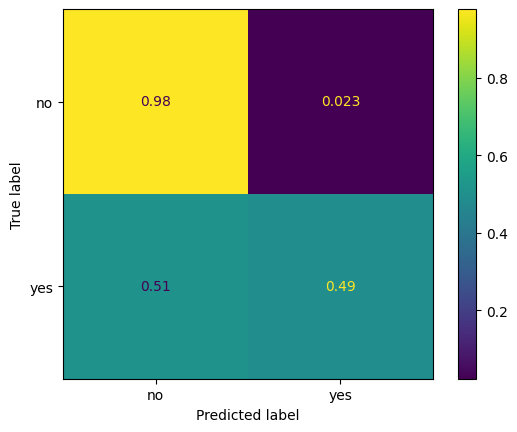

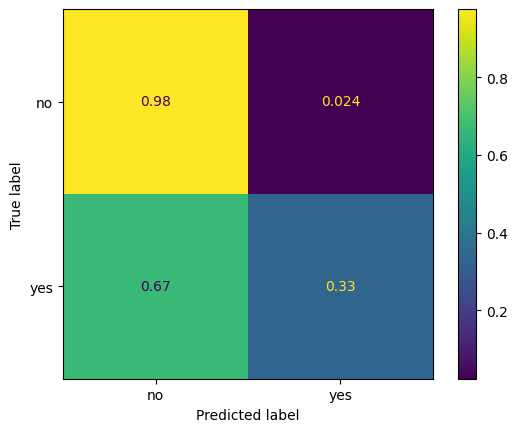

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_model, test_features, test_classes, normalize='true')
ConfusionMatrixDisplay.from_estimator(log_model, test_features, test_classes, normalize='true')